# Clustering of Countries 

1. Data Understanding and Cleaning

# 3. Modelling

In [1]:
# importing dependencies
import pandas as pd
import numpy as np
# importing Visualisation lib's
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale
#clustering_k means
from sklearn.cluster import KMeans

# clustering hierarchy
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# reading the file into jupyter notebook
help_df = pd.read_csv('Country-data.csv')
help_df1 = pd.read_csv('Country-data.csv')

In [3]:
#first 5 values
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# check for null values
help_df.isnull().values.any()


False

In [5]:
help_df.isnull().values.sum()


0

In [6]:
help_df.isnull().sum()*100/help_df.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
help_ = help_df.dropna()

In [8]:
help_.shape
help_.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Here the exports, imports and health columns are all percentages of the countries GDP. so we would have to multiply these columns with GDP so that we get absolute value of health, imports, exports  

In [9]:
help_df['exports'] = help_df['exports']*help_df['gdpp']/100
help_df['imports'] = help_df['imports']*help_df['gdpp']/100
help_df['health'] = help_df['health']*help_df['gdpp']/100

In [10]:
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
help_df.shape

(167, 10)

how lets see the corelation between all the independent variables

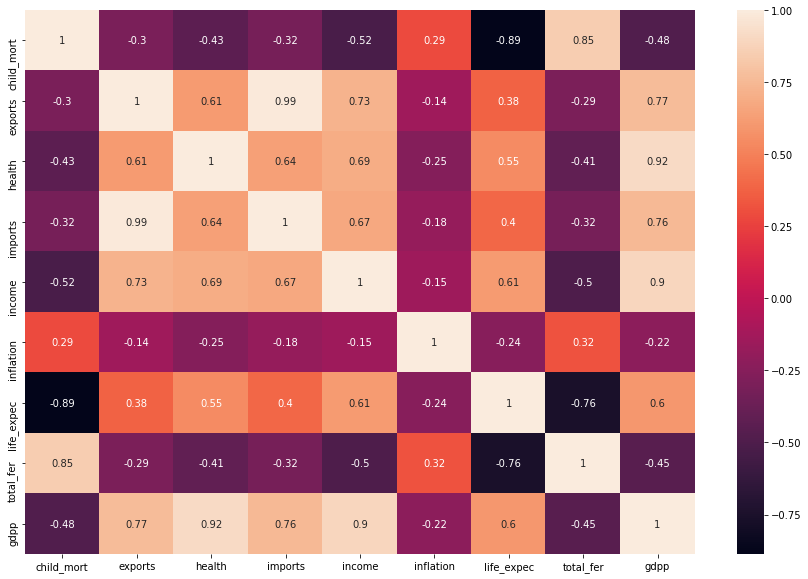

In [12]:
plt.figure(figsize = (15,10))        
sns.heatmap(help_df.corr(),annot = True)

# 2. Data Preparation

In [13]:
# importing scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_col=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
help_df[num_col] = scaler.fit_transform(help_df[num_col])
stand_df=help_df[num_col]


In [14]:
# head of the scaled df
stand_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.000295,0.003363,0.001661,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.006227,0.029486,0.013327,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.009315,0.020017,0.009388,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.011963,0.010148,0.010152,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.030204,0.083558,0.048190,0.148652,0.052213,0.881657,0.154574,0.114242


# 3. Modelling

In [15]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [16]:
# PCA fit
pca.fit(stand_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [17]:
# pca components
pca.components_

array([[-0.41273803,  0.14943954,  0.40204116,  0.15384154,  0.31064148,
        -0.07868479,  0.38103111, -0.49084547,  0.36497591],
       [ 0.38520548,  0.2238652 ,  0.48501654,  0.21403821,  0.24345369,
         0.03466604, -0.19791818,  0.50563849,  0.40636731],
       [-0.02522645,  0.36562773, -0.61311681,  0.29315364,  0.49816819,
         0.3893087 ,  0.03355813,  0.03324431,  0.04318073],
       [ 0.34256716,  0.20745092, -0.07062458,  0.21904821,  0.01265749,
        -0.36739942, -0.5608402 , -0.58047381,  0.00279012],
       [ 0.22843027, -0.23543156,  0.22444136, -0.25697077,  0.04214339,
         0.77155762, -0.19719664, -0.3702444 ,  0.05421288],
       [-0.11042061,  0.39900337,  0.17163435,  0.51188768, -0.6284369 ,
         0.32451835,  0.05692902, -0.02526133, -0.1816373 ],
       [-0.70628529, -0.01364106,  0.06714428, -0.04131002,  0.05609038,
         0.0713955 , -0.67637911,  0.16430499,  0.04507621],
       [ 0.00770111,  0.04208025,  0.36727209,  0.10634129,  0

In [18]:
pca.explained_variance_ratio_

array([6.45017941e-01, 1.99297776e-01, 4.63812831e-02, 4.22830904e-02,
       3.07305476e-02, 2.24898783e-02, 1.19326621e-02, 1.69293471e-03,
       1.73887528e-04])

In [19]:
# features and PC1 to PC2
colnames = list(help_df[num_col].columns)
pca_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1] ,'PC3':pca.components_[2]})
pca_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.412738,0.385205,-0.025226
1,exports,0.149440,0.223865,0.365628
2,health,0.402041,0.485017,-0.613117
3,imports,0.153842,0.214038,0.293154
4,income,0.310641,0.243454,0.498168
5,inflation,-0.078685,0.034666,0.389309
6,life_expec,0.381031,-0.197918,0.033558
7,total_fer,-0.490845,0.505638,0.033244
8,gdpp,0.364976,0.406367,0.043181


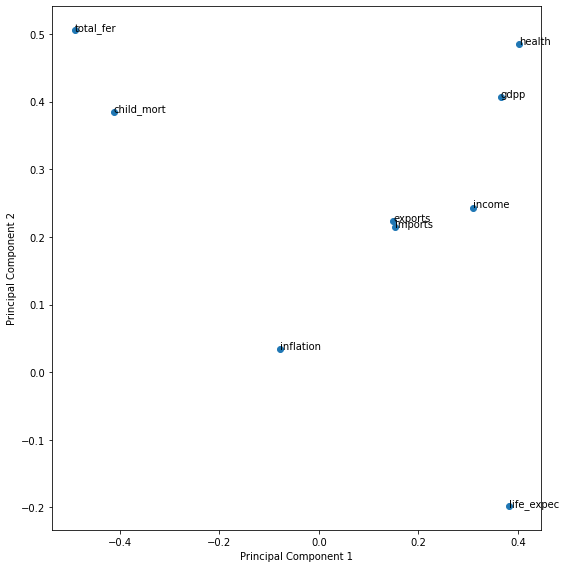

In [20]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [21]:
# plotting the pc valuses on x-y chart
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [22]:
# varience for all the columns
pca.explained_variance_ratio_

array([6.45017941e-01, 1.99297776e-01, 4.63812831e-02, 4.22830904e-02,
       3.07305476e-02, 2.24898783e-02, 1.19326621e-02, 1.69293471e-03,
       1.73887528e-04])

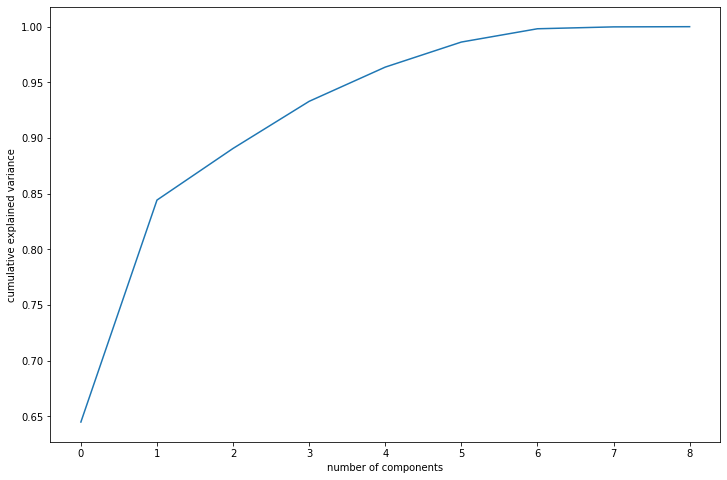

In [23]:
# cummulative varience

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [24]:
colnames = list(help_df.drop('country',axis=1).columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.412738,0.385205,-0.025226
1,exports,0.149440,0.223865,0.365628
2,health,0.402041,0.485017,-0.613117
3,imports,0.153842,0.214038,0.293154
4,income,0.310641,0.243454,0.498168
5,inflation,-0.078685,0.034666,0.389309
6,life_expec,0.381031,-0.197918,0.033558
7,total_fer,-0.490845,0.505638,0.033244
8,gdpp,0.364976,0.406367,0.043181


In [25]:
# kmeans clustering
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [26]:
# 5 components for 90+ varience
help_pc = pca_final.fit_transform(stand_df)
help_pc.shape

(167, 3)

In [27]:
#take the transpose of the PC matrix so that we can create the new matrix
pc = np.transpose(help_pc)
pc

array([[ 5.77543579e-01, -9.42284893e-02,  2.55102488e-02,
         6.15072814e-01, -1.57521810e-01, -9.70844234e-02,
        -4.52921809e-02, -6.01142456e-01, -6.68495664e-01,
         7.45112339e-03, -2.91810701e-01, -2.56960343e-01,
         1.14855108e-01, -2.06918792e-01, -1.06066701e-01,
        -6.17345974e-01,  3.11965760e-02,  5.34553636e-01,
         7.06549908e-02,  1.52784988e-01, -1.59256233e-01,
         1.89786578e-01, -1.27476390e-01, -4.34508462e-01,
        -1.32419552e-01,  6.19153303e-01,  6.13380260e-01,
         1.75077135e-01,  5.37879956e-01, -6.44033423e-01,
         4.93871709e-02,  7.11963945e-01,  7.50618971e-01,
        -2.04791002e-01, -8.41053229e-02, -8.20499052e-02,
         4.13580746e-01,  6.87676928e-01,  4.13074088e-01,
        -1.68738330e-01,  5.66264323e-01, -2.27781005e-01,
        -4.20726709e-01, -3.26040588e-01, -7.41762607e-01,
         1.77322810e-02, -4.95078510e-03,  1.11822792e-01,
        -1.16796392e-02,  3.54750518e-01,  3.75961548e-0

In [28]:
# rownames = help_df['country']
pca_df = pd.DataFrame({'country':help_df1['country'],'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
pca_df.head()

,country,PC1,PC2,PC3
0,Afghanistan,0.577544,0.229251,0.025195
1,Albania,-0.094228,-0.274495,-0.025176
2,Algeria,0.025510,-0.150158,0.121771
3,Angola,0.615073,0.327100,0.107719
4,Antigua and Barbuda,-0.157522,-0.162526,0.024333


In [29]:
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.000295,0.003363,0.001661,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.006227,0.029486,0.013327,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.009315,0.020017,0.009388,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.011963,0.010148,0.010152,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.030204,0.083558,0.048190,0.148652,0.052213,0.881657,0.154574,0.114242


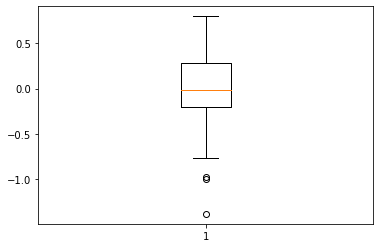

In [30]:
# outlier treatment1
plt.boxplot(pca_df.PC1)
Q1 = pca_df.PC1.quantile(0.25)
Q3 = pca_df.PC1.quantile(0.75)
IQR = Q3 - Q1
help_ = help_[(pca_df.PC1 >= Q1 - 1.5*IQR) & (pca_df.PC1 <= Q3 + 1.5*IQR)]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


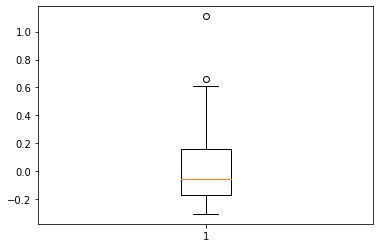

In [31]:
# outlier treatment2
plt.boxplot(pca_df.PC2)
Q1 = pca_df.PC2.quantile(0.25)
Q3 = pca_df.PC2.quantile(0.75)
IQR = Q3 - Q1
help_ = help_[(pca_df.PC2 >= Q1 - 1.5*IQR) & (pca_df.PC2 <= Q3 + 1.5*IQR)]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


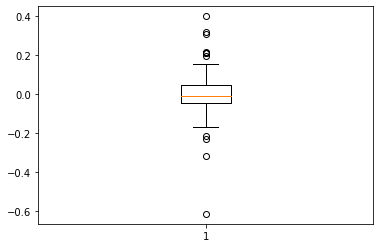

In [32]:
# outlier treatment3
plt.boxplot(pca_df.PC3)
Q1 = pca_df.PC3.quantile(0.25)
Q3 = pca_df.PC3.quantile(0.75)
IQR = Q3 - Q1
help_ = help_[(pca_df.PC3 >= Q1 - 1.5*IQR) & (pca_df.PC3 <= Q3 + 1.5*IQR)]

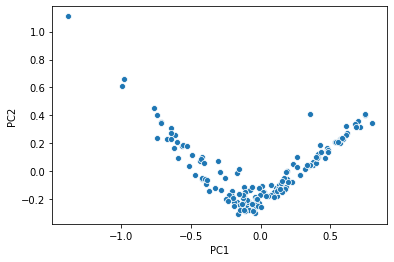

In [33]:
sns.scatterplot(x='PC1',y='PC2',data=pca_df)

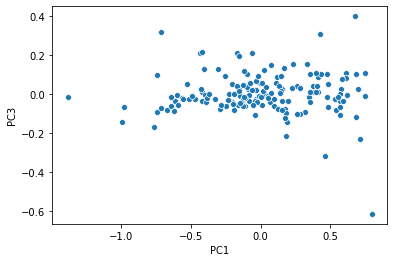

In [34]:
sns.scatterplot(x='PC1',y='PC3',data=pca_df)

# Clustering

# K-means

In [35]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
hopkins(pca_df.drop(['country'],axis=1))

0.8615601411465492

In [37]:
pc_df = pca_df
standard_scaler = StandardScaler()
stand_pc = standard_scaler.fit_transform(pc_df.drop(['country'],axis=1))

In [38]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(stand_pc)
    sse_.append([k, silhouette_score(stand_pc, kmeans.labels_)])

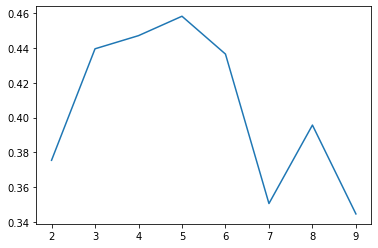

In [39]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [40]:
#clustering
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(stand_pc)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
# Silhouette score
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(stand_pc)
    sse_.append([k, silhouette_score(stand_pc, kmeans.labels_)])

In [42]:
dat4=pca_df
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus5.labels_)], axis=1)
dat_km.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,0.577544,0.229251,0.025195,1
1,Albania,-0.094228,-0.274495,-0.025176,0
2,Algeria,0.025510,-0.150158,0.121771,4
3,Angola,0.615073,0.327100,0.107719,1
4,Antigua and Barbuda,-0.157522,-0.162526,0.024333,0


In [43]:
dat_km['ClusterID'].value_counts()

0    89
1    35
2    21
4    19
3     3
Name: ClusterID, dtype: int64

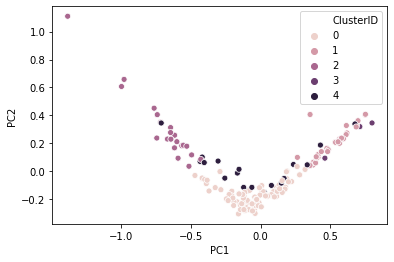

In [44]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

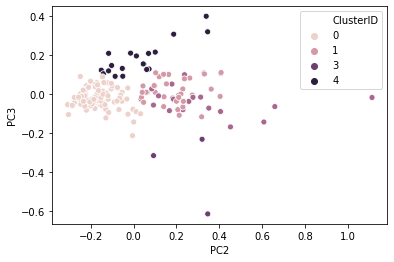

In [45]:
sns.scatterplot(x='PC2',y='PC3',hue='ClusterID',data=dat_km)

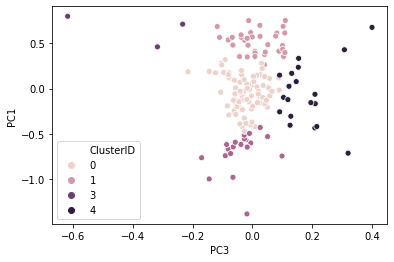

In [46]:
sns.scatterplot(x='PC3',y='PC1',hue='ClusterID',data=dat_km)

In [47]:
dat5=pd.merge(help_df,dat_km,on='country')
dat6=dat5[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
clu_chi = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_imp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_hea = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_inc = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())         
clu_lif = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tot = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

df = pd.concat([pd.Series([0,1,2,3,4]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
df.columns = ["ClusterID", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df

,ClusterID,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,0.098120,0.019935,0.026773,0.064339,0.098808,0.094233,0.797088,0.163737,0.071856
1,1,0.449562,0.004686,0.004475,0.006993,0.021949,0.132128,0.547422,0.657639,0.012762
2,2,0.007790,0.179596,0.192867,0.604020,0.367164,0.052561,0.964497,0.097717,0.491171
3,3,0.728497,0.001110,0.003859,0.005969,0.007881,0.074670,0.195924,0.441115,0.005043
4,4,0.115000,0.054221,0.040917,0.077848,0.258082,0.219364,0.827676,0.336543,0.164468


In [48]:
dat6[dat6['ClusterID']==0].head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,0.068160,0.006227,0.013327,0.029486,0.074933,0.080399,0.871795,0.078864,0.036833,0
4,Antigua and Barbuda,0.037488,0.030204,0.048190,0.083558,0.148652,0.052213,0.881657,0.154574,0.114242,0
6,Armenia,0.075463,0.003639,0.009779,0.014896,0.048967,0.110711,0.812623,0.085174,0.028529,0
9,Azerbaijan,0.178189,0.017252,0.008104,0.038213,0.123731,0.166436,0.729783,0.121451,0.053537,0
10,Bahamas,0.054528,0.053328,0.082062,0.253894,0.179201,0.035274,0.822485,0.111987,0.265050,0


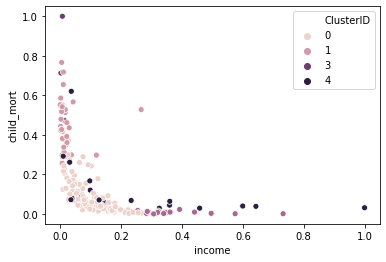

In [62]:
#K-means has done a satisfactory job here. Let's take a different approach and make the clusters only on the basis of these
sns.scatterplot(x='income',y='child_mort',hue='ClusterID',data=dat6)

# Hierarchical Clustering

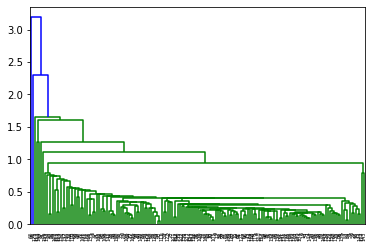

In [50]:
mergings = linkage(stand_pc, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

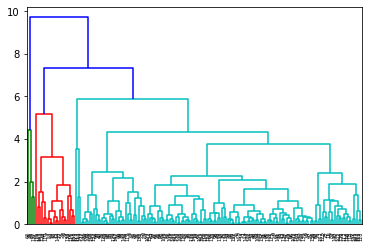

In [51]:
mergings = linkage(stand_pc, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [52]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat3_hc = pd.concat([pc_df, clusterCut], axis=1)
dat3_hc.columns = ['country', 'PC1', 'PC2','PC3','ClusterID']

In [53]:
dat3_hc.head()

,country,PC1,PC2,PC3,ClusterID
0,Afghanistan,0.577544,0.229251,0.025195,0
1,Albania,-0.094228,-0.274495,-0.025176,0
2,Algeria,0.025510,-0.150158,0.121771,0
3,Angola,0.615073,0.327100,0.107719,0
4,Antigua and Barbuda,-0.157522,-0.162526,0.024333,0


In [54]:
dat7=pd.merge(help_df,dat3_hc,on='country')
dat8=dat7[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','ClusterID']]
dat8.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,0.426485,0.000295,0.001661,0.003363,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,Albania,0.068160,0.006227,0.013327,0.029486,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.009315,0.009388,0.020017,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.011963,0.010152,0.010148,0.042535,0.245911,0.552268,0.790221,0.031488,0
4,Antigua and Barbuda,0.037488,0.030204,0.048190,0.083558,0.148652,0.052213,0.881657,0.154574,0.114242,0


In [55]:
dat8['ClusterID'].value_counts()

0    140
1     19
2      4
4      3
3      1
Name: ClusterID, dtype: int64

In [56]:
dat8[dat8['ClusterID']==2]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
31,Central African Republic,0.712756,0.000281,0.000788,0.000570,0.002243,0.057481,0.303748,0.640379,0.002052,2
66,Haiti,1.000000,0.000545,0.002868,0.003806,0.007163,0.089271,0.000000,0.343849,0.004114,2
87,Lesotho,0.472736,0.002503,0.007921,0.013530,0.014237,0.077257,0.284024,0.339117,0.008963,2
137,South Africa,0.248783,0.011325,0.013374,0.073752,0.091574,0.097588,0.437870,0.227129,0.067281,2


In [57]:
dat8[dat8['ClusterID']==3]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,0.000974,1.0,1.0,0.941612,0.732296,0.072359,0.970414,0.07571,1.0,3


In [58]:
dat8[dat8['ClusterID']==0].head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,0.426485,0.000295,0.001661,0.003363,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,Albania,0.068160,0.006227,0.013327,0.029486,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,Algeria,0.120253,0.009315,0.009388,0.020017,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,Angola,0.566699,0.011963,0.010152,0.010148,0.042535,0.245911,0.552268,0.790221,0.031488,0
4,Antigua and Barbuda,0.037488,0.030204,0.048190,0.083558,0.148652,0.052213,0.881657,0.154574,0.114242,0


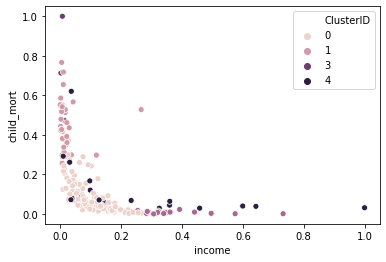

In [63]:
datp=dat8[dat8['ClusterID']==0]
sns.scatterplot(x='income',y='child_mort',hue='ClusterID',data=dat6)

As we couldn't get proper results from hierarchical clustering and the data is skewed in cluster 0 (as most of the cluster have high mortility).


we could still see than not all countries in cluster 0 need aid as most of them have income >> child_mort